In [315]:
#import necessary modules needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

### Data we are using and their sources
* All international matches that happened since 1872 to 2022 = https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv
* FIFA World Cup Ranking since 1992 to 2022 = https://www.kaggle.com/datasets/cashncarry/fifaworldranking
* FIFA 23 Official Dataset of Players Stats (Video Game) = https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database
* Group stages of FIFA World Cup 2022 = https://www.kaggle.com/datasets/sivahemang/fifaworldcup



### We first clean and get our data in the desired form to throw it in the model

In [316]:
# all international matches from 1872 to 2022
country_fifa_rankings = pd.read_csv("results.csv")

country_fifa_rankings["date"] = pd.to_datetime(country_fifa_rankings["date"])

#Filter from 1992 as the data for other starts from 1992 
country_fifa_rankings = country_fifa_rankings[(country_fifa_rankings["date"] >= "1992-1-1")].reset_index(drop=True)

country_fifa_rankings.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1992-01-04,Egypt,Czechoslovakia,2.0,0.0,Friendly,Cairo,Egypt,False
1,1992-01-05,DR Congo,Ivory Coast,2.0,0.0,Friendly,Kinshasa,Zaïre,False
2,1992-01-05,Guyana,Barbados,0.0,2.0,Friendly,Georgetown,Guyana,False
3,1992-01-07,Egypt,Norway,0.0,0.0,Friendly,Cairo,Egypt,False
4,1992-01-12,Cameroon,Morocco,1.0,0.0,African Cup of Nations,Dakar,Senegal,True


In [317]:
# all goals scored in every international match
country_goals = pd.read_csv("goalscorers.csv")
country_goals.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [318]:
# get fifa world cup ranking of each country
rank = pd.read_csv("fifa_ranking-2022-10-06.csv")

#cleaning FIFA World Cup Rank data
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
# some countries are formatted differently
rank['country_full'] = rank['country_full'].replace(["IR Iran","Korea Republic", "USA"],["Iran","South Korea","United States"])
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2003-01-15,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
1,2003-01-16,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
2,2003-01-17,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
3,2003-01-18,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC
4,2003-01-19,204.0,Afghanistan,AFG,7.0,0.0,0.0,AFC


In [319]:
#getting average rating of each country with player ratings of that nationality from FIFA17-FIFA23
fifa_year_player_ranking = []

for f_y in range(17,24):
    fifa_year_player_ranking += [pd.read_csv(f"FIFA{f_y}_official_data.csv")]

fifa_player_ranking = pd.concat(fifa_year_player_ranking)
fifa_player_ranking_mean = fifa_player_ranking.groupby('Nationality').mean()

country_average_rating = fifa_player_ranking_mean[["Overall"]]

country_average_rating.head()

,Overall
Nationality,
Afghanistan,61.437500
Albania,66.601329
Algeria,70.662304
Andorra,62.400000
Angola,68.345133


[Text(0.5, 1.0, 'Overall by Team')]

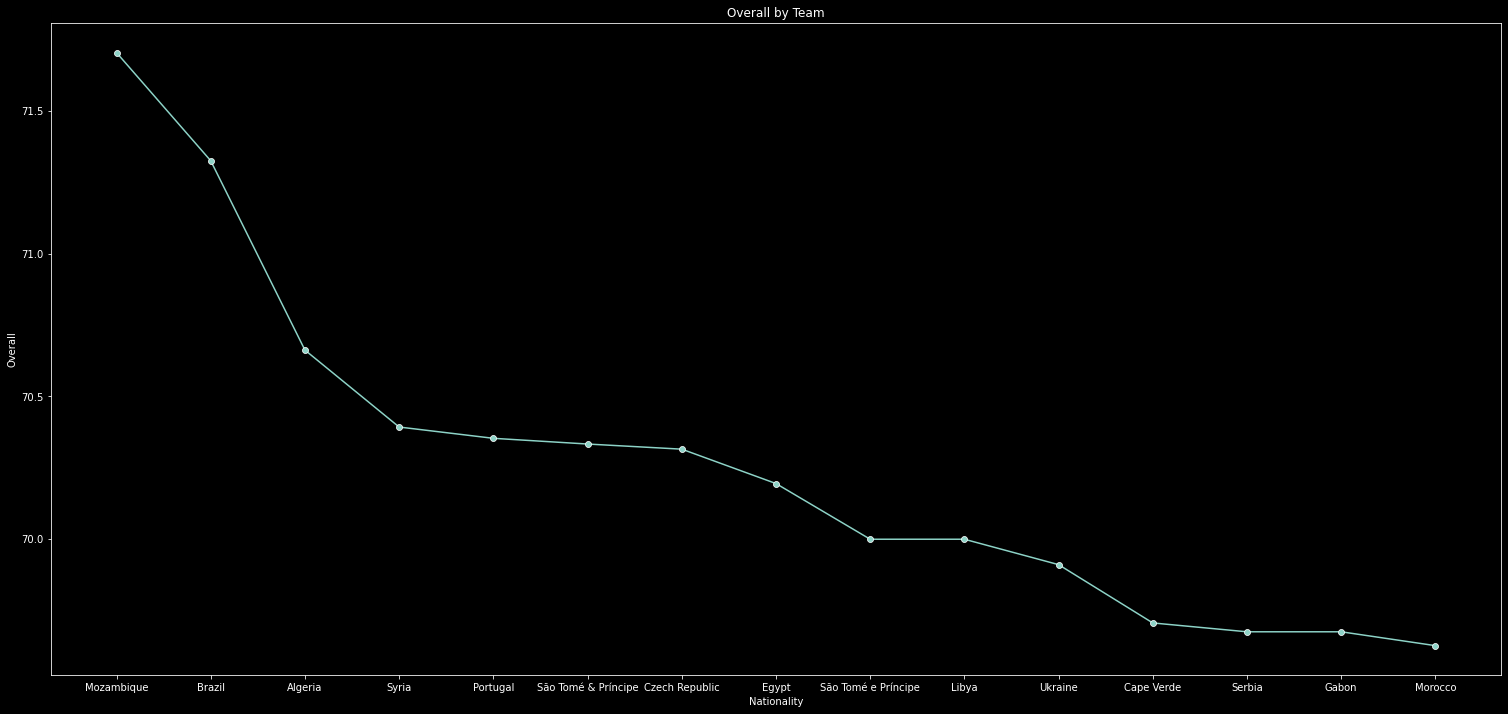

In [320]:
#comparing overall rating of each country from game FIFA
plt_data = country_average_rating.sort_values(by='Overall', ascending=False)[:15]
plt.figure(figsize = (26,12))
sns.lineplot(x = plt_data.index, y = "Overall",marker="o",data = plt_data).set(title="Overall by Team")

In [321]:
# flip rows and columns for the sake of plotting
ranking_grouped = pd.pivot_table(data = rank, values = 'total_points',index = 'country_full',columns = 'rank_date').fillna(method="bfill")
ranking_grouped.head()

rank_date,1992-12-31,1993-01-01,1993-01-02,1993-01-03,1993-01-04,1993-01-05,1993-01-06,1993-01-07,1993-01-08,1993-01-09,...,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04
Albania,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1354.11
Algeria,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,...,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1489.10
American Samoa,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1035.20


No handles with labels found to put in legend.


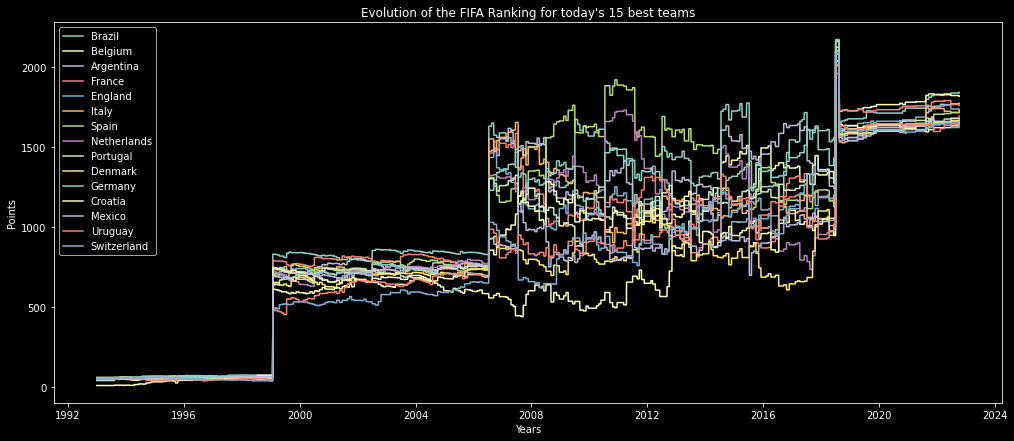

In [322]:
# seeing how to points of top 15 countries changed to see if its a good feature to use
sorted_rank = ranking_grouped.sort_values(by=['2022-10-06'], ascending=False)[:15]

fig,ax = plt.subplots(figsize = (17,7))
ax.legend(loc='upper left')
plt.subplot()
for i in range(len(sorted_rank.values)):
    ax.plot(sorted_rank.columns,sorted_rank.iloc[i], label = sorted_rank.index[i])

ax.set_title("Evolution of the FIFA Ranking for today's 15 best teams")
ax.set_xlabel("Years")
ax.set_ylabel("Points")
ax.legend()

In [323]:
# we only want to work with world cup matches
temp = country_fifa_rankings[(country_fifa_rankings["tournament"] == "FIFA World Cup")]
home = temp[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = temp[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
team_score = home.append(away).reset_index(drop=True)

#creating dataframe to get one of our feature: average goal scored per match by each nationality
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})
country_info.head()

,team,nb_goals,nb_matches,goal_avg
0,Algeria,7.0,7,1.000000
1,Angola,1.0,3,0.333333
2,Argentina,56.0,34,1.647059
3,Australia,14.0,14,1.000000
4,Austria,3.0,3,1.000000


Text(0.5, 1.0, 'Teams Goal Average')

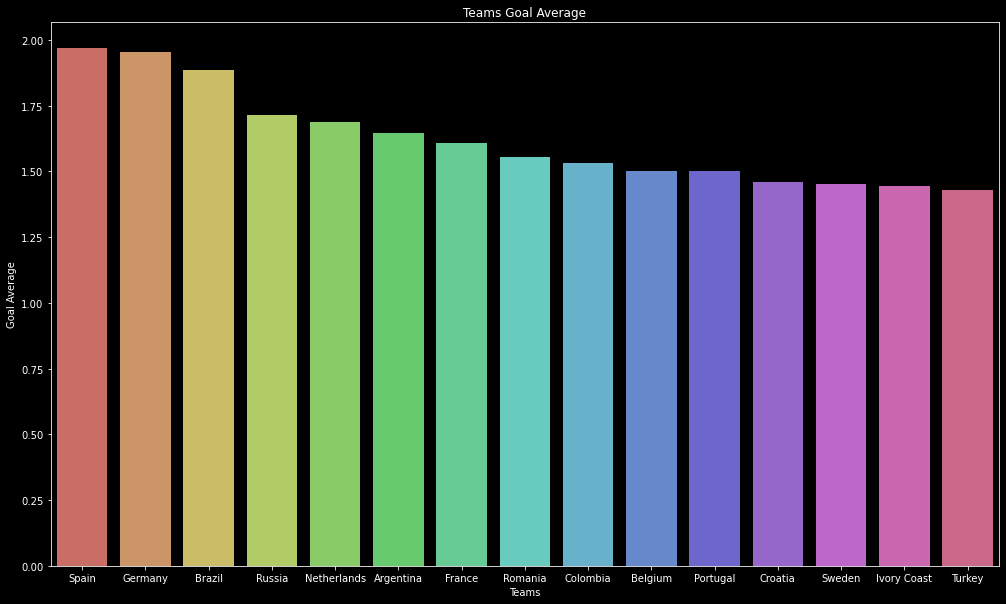

In [324]:
#creating graph to show top 15 countries with the highest average goal scored per match
plt.figure(figsize = (17,10))
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:15]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="hls")

ax.set_xlabel("Teams")
ax.set_ylabel("Goal Average")
ax.set_title("Teams Goal Average")

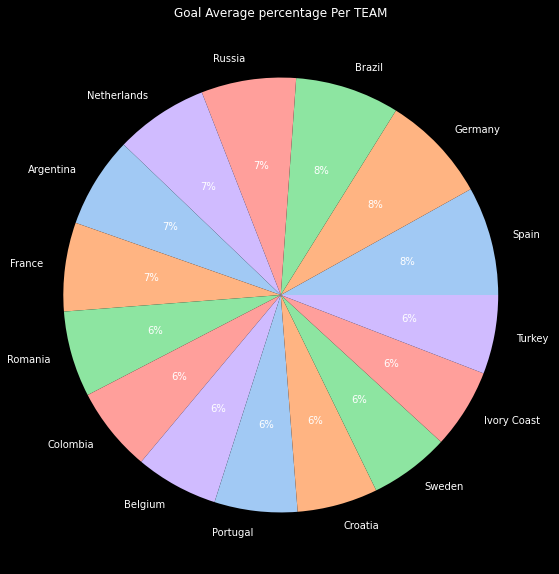

In [325]:
# seeing the ratio of top 15 countries based on goal average scored per match
plt.figure(figsize=(10,10))
colorss = sns.color_palette('pastel')[0:5]
plt.pie(plt_data["goal_avg"], labels=plt_data["team"],autopct="%.0f%%",colors = colorss)
plt.title("Goal Average percentage Per TEAM")

plt.show()

In [326]:
#getting only the columns we are going to be working with for the model
country_match_info = country_fifa_rankings[["date","home_team","away_team","home_score","away_score","tournament"]]

#get only fifa world cup matches
country_match_info = country_match_info[(country_match_info["tournament"] == "FIFA World Cup")]

country_match_info.fillna(country_match_info.mean().astype("int"), inplace=True)

country_match_info = country_match_info.reset_index(drop=True)

country_match_info.head()

/var/folders/ss/rf2h413d59s5bb20cxk9hwl80000gn/T/ipykernel_74056/1598194836.py:7: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/ss/rf2h413d59s5bb20cxk9hwl80000gn/T/ipykernel_74056/1598194836.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,date,home_team,away_team,home_score,away_score,tournament
0,1994-06-17,Germany,Bolivia,1.0,0.0,FIFA World Cup
1,1994-06-17,Spain,South Korea,2.0,2.0,FIFA World Cup
2,1994-06-18,Colombia,Romania,1.0,3.0,FIFA World Cup
3,1994-06-18,Italy,Republic of Ireland,0.0,1.0,FIFA World Cup
4,1994-06-18,United States,Switzerland,1.0,1.0,FIFA World Cup


In [327]:
# getting the necessary stats for each matches 
tmp = country_match_info.merge(rank, left_on=["date","home_team"], right_on=["rank_date","country_full"])
tmp = tmp.merge(rank, left_on=["date","away_team"], right_on=["rank_date","country_full"],suffixes=("_home","_away"))
tmp

,date,home_team,away_team,home_score,away_score,tournament,rank_date_home,rank_home,country_full_home,country_abrv_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1994-06-17,Germany,Bolivia,1.0,0.0,FIFA World Cup,1994-06-17,1.0,Germany,GER,...,-1.0,UEFA,1994-06-17,43.0,Bolivia,BOL,35.0,35.0,0.0,CONMEBOL
1,1994-06-17,Spain,South Korea,2.0,2.0,FIFA World Cup,1994-06-17,5.0,Spain,ESP,...,-4.0,UEFA,1994-06-17,37.0,South Korea,KOR,38.0,37.0,0.0,AFC
2,1994-06-18,Colombia,Romania,1.0,3.0,FIFA World Cup,1994-06-18,17.0,Colombia,COL,...,-1.0,CONMEBOL,1994-06-18,7.0,Romania,ROU,55.0,54.0,-3.0,UEFA
3,1994-06-18,Italy,Republic of Ireland,0.0,1.0,FIFA World Cup,1994-06-18,4.0,Italy,ITA,...,-12.0,UEFA,1994-06-18,14.0,Republic of Ireland,IRL,53.0,52.0,2.0,UEFA
4,1994-06-18,United States,Switzerland,1.0,1.0,FIFA World Cup,1994-06-18,23.0,United States,USA,...,0.0,CONCACAF,1994-06-18,12.0,Switzerland,SUI,54.0,54.0,4.0,UEFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2018-07-07,Russia,Croatia,2.0,2.0,FIFA World Cup,2018-07-07,49.0,Russia,RUS,...,-12.0,UEFA,2018-07-07,12.0,Croatia,CRO,2036.0,1990.0,-6.0,UEFA
417,2018-07-10,France,Belgium,1.0,0.0,FIFA World Cup,2018-07-10,2.0,France,FRA,...,-2.0,UEFA,2018-07-10,5.0,Belgium,BEL,2124.0,2098.0,-1.0,UEFA
418,2018-07-11,Croatia,England,2.0,1.0,FIFA World Cup,2018-07-11,12.0,Croatia,CRO,...,-6.0,UEFA,2018-07-11,7.0,England,ENG,2099.0,2074.0,-2.0,UEFA
419,2018-07-14,Belgium,England,2.0,0.0,FIFA World Cup,2018-07-14,5.0,Belgium,BEL,...,-1.0,UEFA,2018-07-14,7.0,England,ENG,2099.0,2074.0,-2.0,UEFA


In [328]:
# calculating the rank difference and score difference to be used for the model later
imp_data = tmp.loc[:,["date","home_team","home_score","rank_home","away_team","away_score","rank_away"]]
imp_data.loc[:, "rank_difference"] = imp_data.loc[:, "rank_home"] - imp_data.loc[:, "rank_away"]
imp_data.loc[:, "score_difference"] = imp_data.loc[:, "home_score"] - imp_data.loc[:, "away_score"]
imp_data

,date,home_team,home_score,rank_home,away_team,away_score,rank_away,rank_difference,score_difference
0,1994-06-17,Germany,1.0,1.0,Bolivia,0.0,43.0,-42.0,1.0
1,1994-06-17,Spain,2.0,5.0,South Korea,2.0,37.0,-32.0,0.0
2,1994-06-18,Colombia,1.0,17.0,Romania,3.0,7.0,10.0,-2.0
3,1994-06-18,Italy,0.0,4.0,Republic of Ireland,1.0,14.0,-10.0,-1.0
4,1994-06-18,United States,1.0,23.0,Switzerland,1.0,12.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...
416,2018-07-07,Russia,2.0,49.0,Croatia,2.0,12.0,37.0,0.0
417,2018-07-10,France,1.0,2.0,Belgium,0.0,5.0,-3.0,1.0
418,2018-07-11,Croatia,2.0,12.0,England,1.0,7.0,5.0,1.0
419,2018-07-14,Belgium,2.0,5.0,England,0.0,7.0,-2.0,2.0


In [329]:
l = imp_data.merge(country_average_rating, left_on=["home_team"], right_on=["Nationality"])
Var1 = l.merge(country_average_rating, left_on=["away_team"], right_on=["Nationality"],suffixes=["_home","_away"])
Var1["overall_difference"] = Var1["Overall_home"] - Var1["Overall_away"]

Var1 = Var1.merge(country_info,left_on=["home_team"],right_on=['team'])
Var1 = Var1.merge(country_info, left_on=["away_team"], right_on=["team"],suffixes=["_home","_away"])

#getting goal average difference for one of our feature
Var1["goal_avg_difference"] = Var1["goal_avg_home"] - Var1["goal_avg_away"]

#getting result of each match
Var1["win_home"] =  (Var1['score_difference'] > 0).astype(int)

Var1 = Var1.sort_values("date")
Var1 = Var1.drop(["date","team_home","team_away","nb_matches_home","nb_matches_away","nb_goals_home","nb_goals_away"],axis = 1)
Var1.reset_index(drop=True,inplace = True)

#final clean data to be used for the model
Var1

,home_team,home_score,rank_home,away_team,away_score,rank_away,rank_difference,score_difference,Overall_home,Overall_away,overall_difference,goal_avg_home,goal_avg_away,goal_avg_difference,win_home
0,Germany,1.0,1.0,Bolivia,0.0,43.0,-42.0,1.0,66.053407,63.075614,2.977793,1.952381,0.333333,1.619048,1
1,Italy,0.0,4.0,Republic of Ireland,1.0,14.0,-10.0,-1.0,68.237273,60.367440,7.869833,1.344828,1.000000,0.344828,0
2,Colombia,1.0,17.0,Romania,3.0,7.0,10.0,-2.0,66.070135,63.941414,2.128721,1.533333,1.555556,-0.022222,0
3,United States,1.0,23.0,Switzerland,1.0,12.0,11.0,0.0,63.962636,64.744153,-0.781517,0.960000,1.150000,-0.190000,0
4,Norway,1.0,6.0,Mexico,0.0,16.0,-10.0,1.0,63.213714,65.633234,-2.419520,0.857143,1.137931,-0.280788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Sweden,0.0,21.0,England,2.0,7.0,14.0,-2.0,63.861959,63.071634,0.790325,1.450000,1.400000,0.050000,0
391,France,1.0,2.0,Belgium,0.0,5.0,-3.0,1.0,67.639223,67.692472,-0.053249,1.606061,1.500000,0.106061,1
392,Croatia,2.0,12.0,England,1.0,7.0,5.0,1.0,69.271855,63.071634,6.200221,1.458333,1.400000,0.058333,1
393,Belgium,2.0,5.0,England,0.0,7.0,-2.0,2.0,67.692472,63.071634,4.620838,1.500000,1.400000,0.100000,1


## Time to throw our data we cleaned and converted into different models and see which one has the highest accuracy
- Models being used
    - DecisionTreeClassifier
    - LogisticRegression
    - RandomForestClassifier

- Features being used to feed into the model
    - rank_difference = Rank difference between two countries in their rank on FIFA World Cup
    - goal_avg_difference = Difference of goal scored per match average between two countries
    - overall_difference = Difference of their average rating of player stats from the video game FIFA


In [330]:
# features
X = Var1[['rank_difference','goal_avg_difference','overall_difference']]
# output
Y = Var1['win_home']

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

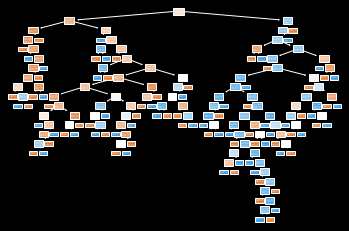

In [332]:
#Getting 
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, Y_train)
plot_tree(dt, filled=True)
plt.show()

In [333]:
train_acc = (Y_train == dt.predict(X_train)).sum()/len(Y_train)
train_acc

1.0

In [334]:
test_acc = (Y_test == dt.predict(X_test)).sum()/len(Y_test)
test_acc

0.569620253164557

In [335]:
from sklearn.metrics import classification_report

#Classification Report for DecisionTreeClassifier 
y_predicted = dt.predict(X_test)

print(classification_report(Y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.64      0.59      0.61        46
           1       0.49      0.55      0.51        33

    accuracy                           0.57        79
   macro avg       0.56      0.57      0.56        79
weighted avg       0.58      0.57      0.57        79



In [336]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [337]:
train_acc = (Y_train == lr_clf.predict(X_train)).sum()/len(Y_train)
train_acc

0.7310126582278481

In [338]:
test_acc = (Y_test == lr_clf.predict(X_test)).sum()/len(Y_test)
test_acc

0.7721518987341772

In [339]:
# Classification Report for LogisticRegression
y_predicted = lr_clf.predict(X_test)

print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        46
           1       0.71      0.76      0.74        33

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79



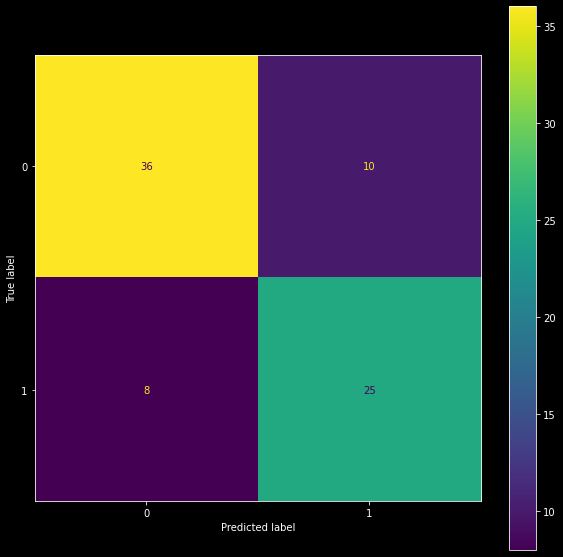

In [340]:
# creating confusionmatrix visualization for logistic regression as it has the high accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = lr_clf
cm = confusion_matrix(Y_test, clf.predict(X_test), labels=clf.classes_)
plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(ax=plt.gca())

In [341]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [342]:
train_acc = (Y_train == rf_clf.predict(X_train)).sum()/len(Y_train)
train_acc

1.0

In [343]:
test_acc = (Y_test == rf_clf.predict(X_test)).sum()/len(Y_test)
test_acc

0.6835443037974683

In [344]:
from sklearn.metrics import classification_report

#Classification Report for RandomForestClassifier
y_predicted = rf_clf.predict(X_test)

print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        46
           1       0.61      0.70      0.65        33

    accuracy                           0.68        79
   macro avg       0.68      0.69      0.68        79
weighted avg       0.69      0.68      0.69        79



## Best accuracy for our dataset comes from: Logistic Regression
### We will proceed to use logistic regression to help us predict the winner of FIFA World Cup 2022 

In [345]:
# extracting data of this year world cup fixtures to group them for qualifiers
world_cup_2022_groups = pd.read_csv("Fifa_Worldcup_2022_Groups.csv")
world_cup_2022_groups.drop(["Flag_Image","Country_Name_Short"],axis=1,inplace=True)
world_cup_2022_groups = world_cup_2022_groups.replace("USA","United States").replace("Korea Republic","South Korea")

#slight cleaning
country_average_rating.rename(index = {"Korea Republic":"South Korea"},inplace = True)
country_average_rating

country_info.head()

/Users/karan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,team,nb_goals,nb_matches,goal_avg
0,Algeria,7.0,7,1.000000
1,Angola,1.0,3,0.333333
2,Argentina,56.0,34,1.647059
3,Australia,14.0,14,1.000000
4,Austria,3.0,3,1.000000


In [346]:
from string import ascii_uppercase
for i in ascii_uppercase:
    if i == "I":
        break
    vars()["group_"+i] = (world_cup_2022_groups[world_cup_2022_groups["Group"] == i])

In [347]:
# Get the latest rank for each country to help us predict more accuracly
latest_ranking = rank[rank["rank_date"] >= "2022-10-06"].reset_index(drop=True)
latest_ranking = latest_ranking[["country_full","rank"]]
latest_ranking.sort_values("rank",ascending=True,inplace=True)
latest_ranking.reset_index(drop=True)

,country_full,rank
0,Brazil,1.0
1,Belgium,2.0
2,Argentina,3.0
3,France,4.0
4,England,5.0
...,...,...
206,Sri Lanka,207.0
207,US Virgin Islands,208.0
208,British Virgin Islands,209.0
209,Anguilla,210.0


In [348]:
#group combinations all
from itertools import product
from string import ascii_uppercase


for c in ascii_uppercase:
    if c == "I":
        break
    else:
        #creating the actual combination
        vars()["group_"+ c +"_combo"] = pd.DataFrame(product(vars()["group_"+ c]["Team"],vars()["group_"+ c]["Team"]))
        vars()["group_"+ c +"_combo"].rename(columns = {0:'Home', 1:'Away'}, inplace = True)

        #removing duplicates produced
        col = ["Home", "Away"]
        vars()["group_"+ c +"_combo"][col] = np.sort(vars()["group_"+ c +"_combo"][col].values, axis=1)
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].drop_duplicates(subset=col)
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"][vars()["group_"+ c +"_combo"]["Home"] != vars()["group_"+ c +"_combo"]["Away"]]


        # adding useful columns of stats of home and away countries needed to help model predict more accurately in a match
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(latest_ranking, left_on=["Home"], right_on=["country_full"])
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(latest_ranking,left_on=["Away"], right_on=["country_full"], suffixes=["_home","_away"])
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(country_average_rating, left_on=["Home"], right_on=["Nationality"])
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(country_average_rating, left_on=["Away"], right_on=["Nationality"],suffixes=["_home","_away"])


        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(country_info,left_on=["Home"],right_on=["team"])
        vars()["group_"+ c +"_combo"] = vars()["group_"+ c +"_combo"].merge(country_info,left_on=["Away"],right_on=["team"],suffixes=["_home","_away"])


        vars()["group_"+ c +"_combo"]["rank_difference"] =  vars()["group_"+ c +"_combo"]["rank_home"] - vars()["group_"+ c +"_combo"]["rank_away"]
        vars()["group_"+ c +"_combo"]["overall_difference"] = vars()["group_"+ c +"_combo"]["Overall_home"] - vars()["group_"+ c +"_combo"]["Overall_away"]
        vars()["group_"+ c +"_combo"]["goal_avg_difference"] = vars()["group_"+ c +"_combo"]["goal_avg_home"] - vars()["group_"+ c +"_combo"]["goal_avg_away"]


        vars()["group_"+ c +"_combo"].drop(["country_full_home","country_full_away","team_home","team_away"],axis=1,inplace=True)



In [349]:
#Group of 32 predictions

for c in ascii_uppercase:
    if c == "I":
        break
    else:
        print(f"Group {c}:")
        x = vars()["group_"+ c +"_combo"][["rank_difference","goal_avg_difference","overall_difference"]]
        grp_teams = vars()["group_"+ c +"_combo"][["Home","Away"]]
        prob_group = lr_clf.predict_proba(x)
        prob_group = pd.DataFrame(prob_group)
        count = 0
        vars()["points_group_"+c] = dict()
        for i in prob_group.values:
            cur_teams = grp_teams.iloc[count]
            if i[0] > i[1]:
                if cur_teams['Away'] in vars()["points_group_"+c]:
                    vars()["points_group_"+c][cur_teams['Away']] += 3
                else:
                    vars()["points_group_"+c][cur_teams['Away']] = 3
                print(f"{cur_teams['Away']} win {cur_teams['Home']} with Prob:{round(i[0],5)}")
            else:
                if cur_teams['Home'] in vars()["points_group_"+c]:
                    vars()["points_group_"+c][cur_teams['Home']] += 3
                else:
                    vars()["points_group_"+c][cur_teams['Home']] = 3
                print(f"{cur_teams['Home']} win {cur_teams['Away']} with Prob:{round(i[1],5)}")
            count += 1
        print()
        #print("/////////////////////////////////////")
        #print(vars()["points_group_"+c])
        #print("......................................")



Group A:
Ecuador win Qatar with Prob:0.63473
Netherlands win Qatar with Prob:0.86261
Senegal win Ecuador with Prob:0.77707
Netherlands win Senegal with Prob:0.50897
Senegal win Qatar with Prob:0.91598
Netherlands win Ecuador with Prob:0.86672

Group B:
England win Iran with Prob:0.70911
England win United States with Prob:0.57993
United States win Iran with Prob:0.76065
England win Wales with Prob:0.75853
Wales win Iran with Prob:0.58276
United States win Wales with Prob:0.55835

Group C:
Argentina win Saudi Arabia with Prob:0.73959
Mexico win Saudi Arabia with Prob:0.5422
Saudi Arabia win Poland with Prob:0.65151
Argentina win Mexico with Prob:0.57126
Argentina win Poland with Prob:0.74685
Mexico win Poland with Prob:0.55163

Group D:
France win Denmark with Prob:0.7776
France win Australia with Prob:0.84689
Denmark win Tunisia with Prob:0.61229
Tunisia win Australia with Prob:0.50044
France win Tunisia with Prob:0.75418
Denmark win Australia with Prob:0.74007

Group E:
Spain win Germ

## Knockout stage

### This is how we pair up the teams in knockout stage, as the complexity of actual FIFA World Cup pairing is done we assume that the countries are paired up randomly into two at each stage of knockout after all match is completed

#### A seed of shuffling is kept so that every run the pairing up is the same

In [350]:
import random 

def build_df(data,seed):
    random.Random(seed).shuffle(data)
    left = []
    right = []
    for i in range(0,len(data),2):
        left += [data[i]]
        right += [data[i+1]]
    
    pongpong = pd.DataFrame({'Home': left, 'Away': right})
    pongpong = pongpong.merge(latest_ranking, left_on=["Home"], right_on=["country_full"])
    pongpong = pongpong.merge(latest_ranking, left_on=["Away"], right_on=["country_full"], suffixes=["_home", "_away"])
    pongpong = pongpong.merge(country_average_rating, left_on=["Home"], right_on=["Nationality"])
    pongpong = pongpong.merge(country_average_rating, left_on=["Away"], right_on=["Nationality"], suffixes=["_home", "_away"])
    pongpong = pongpong.merge(country_info,left_on=["Home"],right_on=["team"])
    pongpong = pongpong.merge(country_info,left_on=["Away"],right_on=["team"],suffixes=["_home","_away"])
    pongpong["rank_difference"] = pongpong["rank_home"] - pongpong["rank_away"]
    pongpong["overall_difference"] = pongpong["Overall_home"] - pongpong["Overall_away"]
    pongpong["goal_avg_difference"] = pongpong["goal_avg_home"] - pongpong["goal_avg_away"]
    pongpong.drop(["country_full_home","country_full_away","team_home","team_away","nb_matches_home","nb_matches_away","nb_goals_home","nb_goals_away"], axis= 1, inplace=True)

    return pongpong

In [351]:
# Feeding the model the matches and letting it predict who will win and what is the chance of it happening

def pred_winner(teams):
    x_func = teams[["rank_difference", "goal_avg_difference","overall_difference"]]
    prob_func = lr_clf.predict_proba(x_func)
    prob_func = pd.DataFrame(prob_func)
    team_next = []
    for i in range(len(prob_func)):
        if prob_func[0].iloc[i] < prob_func[1].iloc[i]:
            print(f"{teams['Home'].iloc[i]} wins {teams['Away'].iloc[i]} with probability:{round(prob_func[1].iloc[i],5)}")
            team_next.append(teams['Home'].iloc[i])
        elif prob_func[0].iloc[i] > prob_func[1].iloc[i]:
            print(f"{teams['Away'].iloc[i]} wins {teams['Home'].iloc[i]} with probability:{round(prob_func[0].iloc[i],5)}")
            team_next.append(teams['Away'].iloc[i])
    return team_next

In [352]:
# Getting the teams that is predicted to qualify for this year World Cup
qualified = []
cur = []

for c in ascii_uppercase:
    if c == "I":
        break
    else:
        qualified += sorted(vars()["points_group_"+c],key=vars()["points_group_"+c].get, reverse=True)[:2]

print("====QUALIFYING TEAMS====")
qualified

====QUALIFYING TEAMS====


['Netherlands',
 'Senegal',
 'England',
 'United States',
 'Argentina',
 'Mexico',
 'France',
 'Denmark',
 'Spain',
 'Germany',
 'Croatia',
 'Belgium',
 'Brazil',
 'Switzerland',
 'Uruguay',
 'Portugal']

In [353]:
#Group of 16
teams_16_df = build_df(qualified,1)
# building next stage
teams_16_df

,Home,Away,rank_home,rank_away,Overall_home,Overall_away,goal_avg_home,goal_avg_away,rank_difference,overall_difference,goal_avg_difference
0,England,Croatia,5.0,12.0,63.071634,69.271855,1.400000,1.458333,-7.0,-6.200221,-0.058333
1,Netherlands,Uruguay,8.0,14.0,67.601645,68.280538,1.687500,1.300000,-6.0,-0.678893,0.387500
2,France,Mexico,4.0,13.0,67.639223,65.633234,1.606061,1.137931,-9.0,2.005989,0.468130
3,United States,Spain,16.0,7.0,63.962636,69.552732,0.960000,1.968750,9.0,-5.590095,-1.008750
4,Denmark,Belgium,10.0,2.0,63.864020,67.692472,1.176471,1.500000,8.0,-3.828452,-0.323529
5,Portugal,Senegal,9.0,18.0,70.353355,68.352285,1.500000,1.400000,-9.0,2.001070,0.100000
6,Brazil,Switzerland,1.0,15.0,71.325113,64.744153,1.886364,1.150000,-14.0,6.580960,0.736364
7,Germany,Argentina,11.0,3.0,66.053407,68.497082,1.952381,1.647059,8.0,-2.443675,0.305322


In [354]:
#Group of 8
team_8 = pred_winner(teams_16_df)
# building next stage
team_8_df = build_df(team_8,1)
team_8_df

Croatia wins England with probability:0.59559
Netherlands wins Uruguay with probability:0.54505
France wins Mexico with probability:0.55979
Spain wins United States with probability:0.90371
Belgium wins Denmark with probability:0.74562
Senegal wins Portugal with probability:0.60316
Brazil wins Switzerland with probability:0.64001
Argentina wins Germany with probability:0.5013


,Home,Away,rank_home,rank_away,Overall_home,Overall_away,goal_avg_home,goal_avg_away,rank_difference,overall_difference,goal_avg_difference
0,Spain,Brazil,7.0,1.0,69.552732,71.325113,1.968750,1.886364,6.0,-1.772382,0.082386
1,Netherlands,Senegal,8.0,18.0,67.601645,68.352285,1.687500,1.400000,-10.0,-0.750641,0.287500
2,Argentina,Croatia,3.0,12.0,68.497082,69.271855,1.647059,1.458333,-9.0,-0.774773,0.188725
3,Belgium,France,2.0,4.0,67.692472,67.639223,1.500000,1.606061,-2.0,0.053249,-0.106061


In [355]:
#Quarter Finals prediction
team_4 = pred_winner(team_8_df)
# building next stage 
team_4_df = build_df(team_4,1)
team_4_df

Brazil wins Spain with probability:0.60247
Netherlands wins Senegal with probability:0.50897
Croatia wins Argentina with probability:0.53689
France wins Belgium with probability:0.68223


,Home,Away,rank_home,rank_away,Overall_home,Overall_away,goal_avg_home,goal_avg_away,rank_difference,overall_difference,goal_avg_difference
0,France,Brazil,4.0,1.0,67.639223,71.325113,1.606061,1.886364,3.0,-3.68589,-0.280303
1,Croatia,Netherlands,12.0,8.0,69.271855,67.601645,1.458333,1.687500,4.0,1.67021,-0.229167


In [356]:
#Semi-Finals predictions
team_2 = pred_winner(team_4_df)
# building next stage
team_2_df = build_df(team_2,1)
team_2_df

Brazil wins France with probability:0.72402
Netherlands wins Croatia with probability:0.74965


,Home,Away,rank_home,rank_away,Overall_home,Overall_away,goal_avg_home,goal_avg_away,rank_difference,overall_difference,goal_avg_difference
0,Netherlands,Brazil,8.0,1.0,67.601645,71.325113,1.6875,1.886364,7.0,-3.723469,-0.198864


In [357]:
#Finals prediction
winner = pred_winner(team_2_df)
print("Winner is : " + winner[0])

Brazil wins Netherlands with probability:0.70026
Winner is : Brazil


### So our model predictes that *Brazil* will win the FIFA World Cup 2022